In [176]:
import import_ipynb
import GraphGenerator as gg
import BruteForce as bf
import BruteForceOptimized as bfo
import AntColonyOptimized as aco

import random
import copy
from matplotlib import pyplot as plt

In [177]:
def plot(num_iterations, length_per_iteration):
    colors = ['xkcd:ruby', 'xkcd:gross green', 'xkcd:bright turquoise', 'xkcd:warm purple', 'xkcd:canary yellow']
    color = random.sample(colors, k=1)[0]
    plt.plot(range(1, num_iterations+1), length_per_iteration, color=color, label='Best Weight')

    indices = [i for i, value in enumerate(length_per_iteration) if value == -1]
    plt.scatter([i+1 for i in indices], [-1]*len(indices), marker='x', color='red', label='Solution not found')
    
    plt.xlabel('Iterations')
    plt.ylabel('Best Weight')
    plt.title('Shortest Number of Steps in Each Iteration')
    plt.legend()

Graph with 23 nodes and 23 edges [7, 17, 8, 12, 14, 9, 11, 19, 10] 1 5


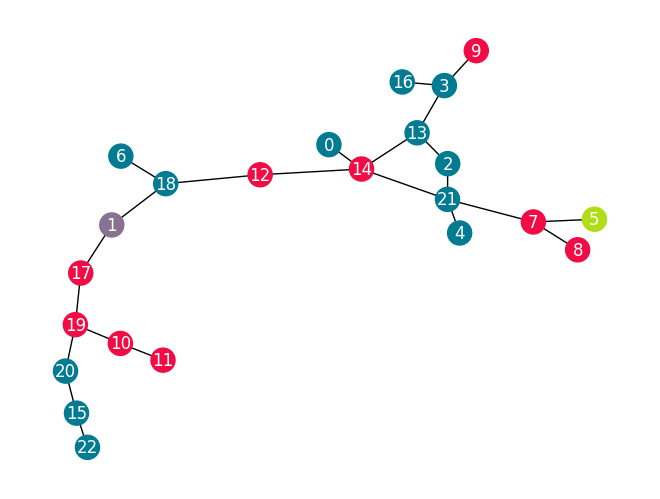

In [194]:
g, obstacles, start_pos, goal_pos = gg.build_graph()
obstacles_start = copy.deepcopy(obstacles)

In [195]:
num_iterations = 100
alpha = 0.9
beta = 1.5
theta = 100
num_ants = 50
rho = 0.9

In [196]:
# Brute Force:
length_per_iteration_bf = bf.find_path(g, start_pos, goal_pos, obstacles, num_iterations=num_iterations)

The minimum length of 42 was found in iteration 91
Time it took to finish the search: 1.950861
Best path of all iterations: 
('r', '1->18')
('o', '7->21')
('o', '11->20')
('o', '8->7')
('o', '14->18')
('r', '18->12')
('o', '20->19')
('o', '10->20')
('o', '21->0')
('r', '12->14')
('o', '17->19')
('r', '14->13')
('o', '20->15')
('r', '13->3')
('o', '18->6')
('o', '9->3')
('o', '10->20')
('o', '21->14')
('o', '6->18')
('o', '18->6')
('o', '0->12')
('o', '0->14')
('o', '14->21')
('o', '3->16')
('o', '21->14')
('r', '3->9')
('o', '6->18')
('o', '10->19')
('r', '9->3')
('o', '12->21')
('r', '3->13')
('o', '21->8')
('o', '8->7')
('o', '19->17')
('o', '21->14')
('o', '7->8')
('r', '13->2')
('r', '2->21')
('o', '11->10')
('r', '21->7')
('o', '10->11')
('r', '7->5')


In [197]:
obstacles = copy.deepcopy(obstacles_start)
length_per_iteration_bfo = bfo.find_path(g, start_pos, goal_pos, obstacles, num_iterations=num_iterations)

The minimum length of 16 was found in iteration 35
Time it took to finish the search: 0.266952
Best path of all iterations: [1, 18, 12, 14, 21, 7, 5]
7->21
19->20
10->19
14->0
12->14
11->10
10->11
14->13
19->10
21->4


In [205]:
for edge in g.edges:
        g.edges[edge]['pheromones'] = round(random.uniform(1e-3, 1e-2), 4)
        g.edges[edge]['weight'] = 1
    
obstacles = copy.deepcopy(obstacles_start)
length_per_iteration_aco = aco.aco(g, start_pos, goal_pos, num_ants, rho, num_iterations, theta, alpha, beta, obstacles)

Sawed off: 6
Sawed off: 0
Sawed off: 4
Sawed off: 16
Best score: 11
Best solution: [1, 18, 12, 14, 21, 7, 5]
Obstacles moved: ['12->18', '18->6', '14->0', '7->21', '21->2']
Time it took to finish the search: 0.516921


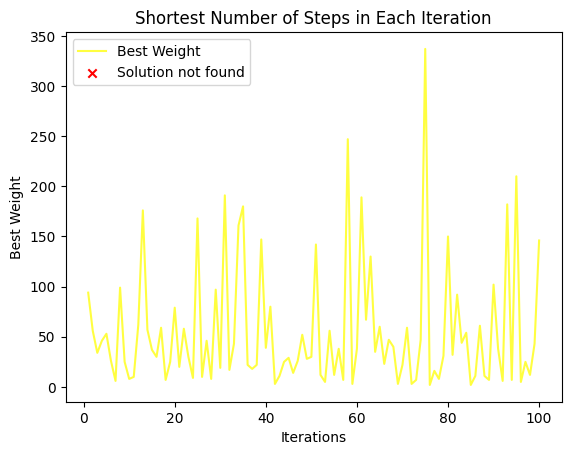

In [11]:
plot(num_iterations, length_per_iteration_bf)

In [12]:
plot(num_iterations, length_per_iteration_bfo)

NameError: name 'length_per_iteration_bfo' is not defined

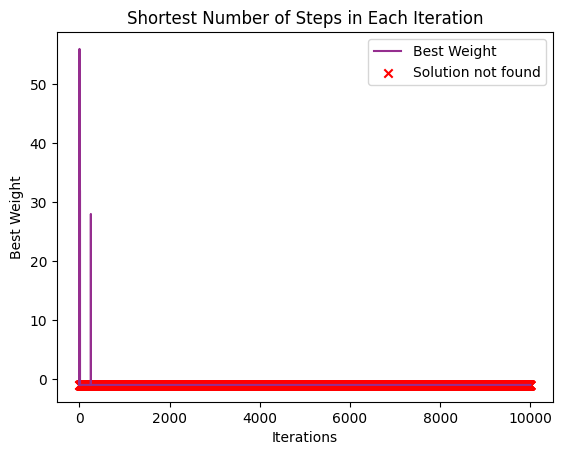

In [62]:
plot(num_iterations, length_per_iteration_aco)